<h3><center>Breaking the Silence:
<br>
 An In-depth Exploration of Rape Statistics in India<h3>

<h4>Import all required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import json

<h4>Upload the datset

In [2]:
Attempt_to_commit_rape_I_V  = pd.read_csv('Rape_Data/Attempt_to_commit_rape_I_V.csv')
CrimeAgainstWomen  = pd.read_csv('Rape_Data/CrimeAgainstWomen_Total_2016-18.csv')
economy_data = pd.read_csv("Rape_Data/Economy_Data.csv")
Rapist_Victim_relation  = pd.read_csv('Rape_Data/Rapist_Victim_relation.csv')
RapeCommited_I_V =pd.read_csv('Rape_Data/RapeCommited_I_V.csv')
Rape_data_2020 = pd.read_csv('Rape_Data/Rape_data_2020.csv')
Rape_under_Different_age_groups_2018 = pd.read_csv('Rape_Data/Rape_under_Different_age_groups_2018.csv')
punished_rapists = pd.read_csv('Rape_Data/punished_rapists.csv')
Police_Disposal_CrimeHead_Wise_2018 = pd.read_csv('Rape_Data/Police_Disposal(CrimeHead-Wise)-2018.csv')
Non_custodial_rape = pd.read_csv('Rape_Data/Non_custodial_rape.csv')
Custodial_rape = pd.read_csv('Rape_Data/Custodial_rape.csv')
Disposal_CrimeHead_Wise_2018 =pd.read_csv('Rape_Data/Disposal(CrimeHead-Wise)-2018.csv')
Population_Dsitribution_statewise = pd.read_csv('Rape_Data/Population_Dsitribution_statewise.csv')
Non_custodial_rape_2021 = pd.read_csv('Rape_Data/Non_custodial_rape_2021.csv')
Custodial_rape_2021 = pd.read_csv('Rape_Data/Custodial_rape_2021.csv')
Police_Disposal_CrimeHead_Wise_2021 = pd.read_csv('Rape_Data\Police_Disposal(CrimeHead-Wise)-2021.csv')

<h5>Tracking underlying patterns in attempted rape cases for women above and below the age of 18 in all Indian states and UTs.

In [3]:
Attempt_to_commit_rape_I_V.describe()

,Attempt to Commit Rape (Total)(I),Attempt to Commit Rape (Total)(V),A) Women (18 Yrs. And above)(I),A) Women (18 Yrs. And above)(I).1,B) Girls (Below 18 yrs))(I),B) Girls (Below 18 yrs))(I).1
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,113.805556,115.472222,101.444444,102.944444,12.361111,12.527778
std,221.117399,222.319395,209.794790,211.104300,26.398217,26.480706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,3.000000,3.750000,0.000000,0.000000
50%,16.000000,21.000000,11.500000,13.500000,4.000000,4.000000
75%,86.750000,87.500000,58.500000,58.500000,7.500000,8.250000
max,944.000000,958.000000,944.000000,958.000000,144.000000,144.000000


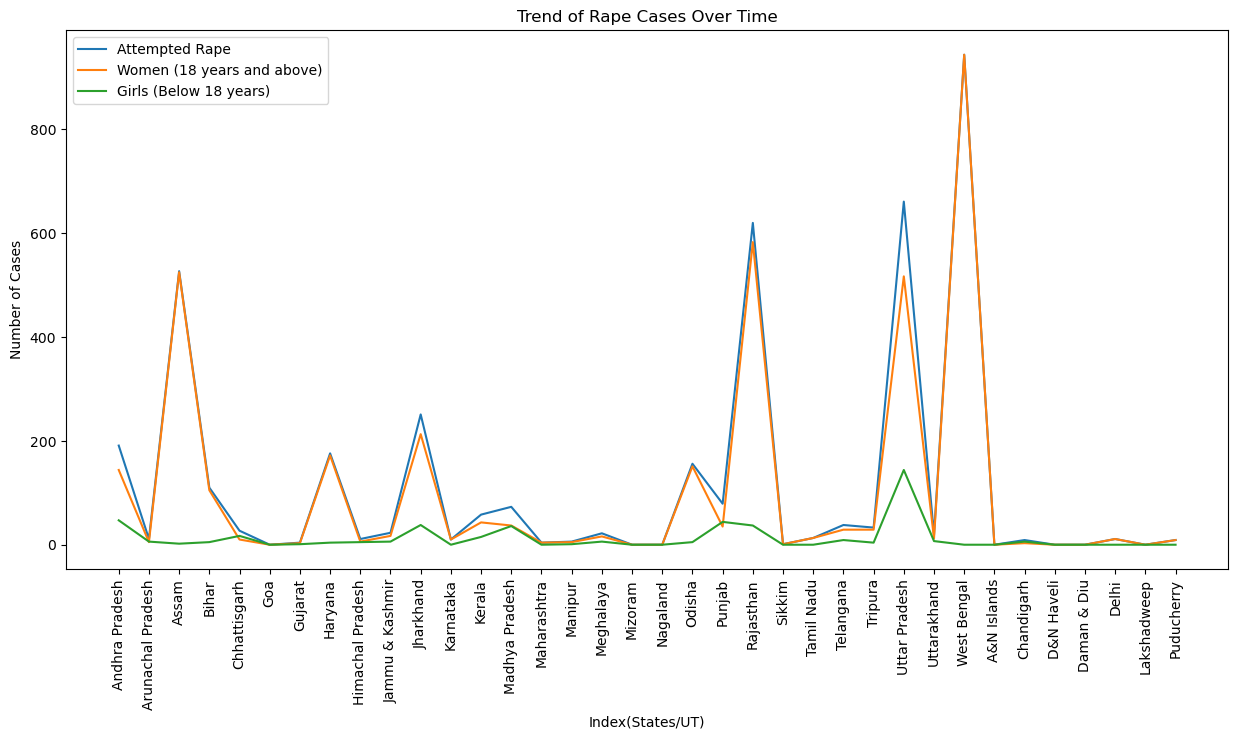

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(Attempt_to_commit_rape_I_V['State/UT'], Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(I)'], label='Attempted Rape')
plt.plot(Attempt_to_commit_rape_I_V['State/UT'], Attempt_to_commit_rape_I_V['A) Women (18 Yrs. And above)(I)'], label='Women (18 years and above)')
plt.plot(Attempt_to_commit_rape_I_V['State/UT'], Attempt_to_commit_rape_I_V['B) Girls (Below 18 yrs))(I)'], label='Girls (Below 18 years)')
plt.title('Trend of Rape Cases Over Time')
plt.xlabel('Index(States/UT)')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


<h5>Exploring the patterns in the crimes reported against women between 2016 and 2018.

In [5]:
CrimeAgainstWomen.describe()

,2016,2017,2018,Percentage State Share To All-India (2018),Mid-Year Projected Female Population (In Lakhs) (2018)+,Rate of Total Crime against Women (2018)++
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,9415.388889,9995.805556,10507.694444,2.775000,178.736111,55.733333
std,11957.110067,12784.449212,13430.229205,3.554665,228.947932,34.450577
min,9.000000,6.000000,11.000000,0.000000,0.300000,7.300000
25%,338.500000,328.000000,339.250000,0.100000,7.675000,36.450000
50%,4784.000000,5008.500000,5562.000000,1.450000,112.250000,51.650000
75%,15326.000000,15413.500000,16129.750000,4.225000,275.175000,66.675000
max,49262.000000,56011.000000,59445.000000,15.700000,1066.800000,166.000000


**Are there any consistent trends over these three years in crime against womens?**

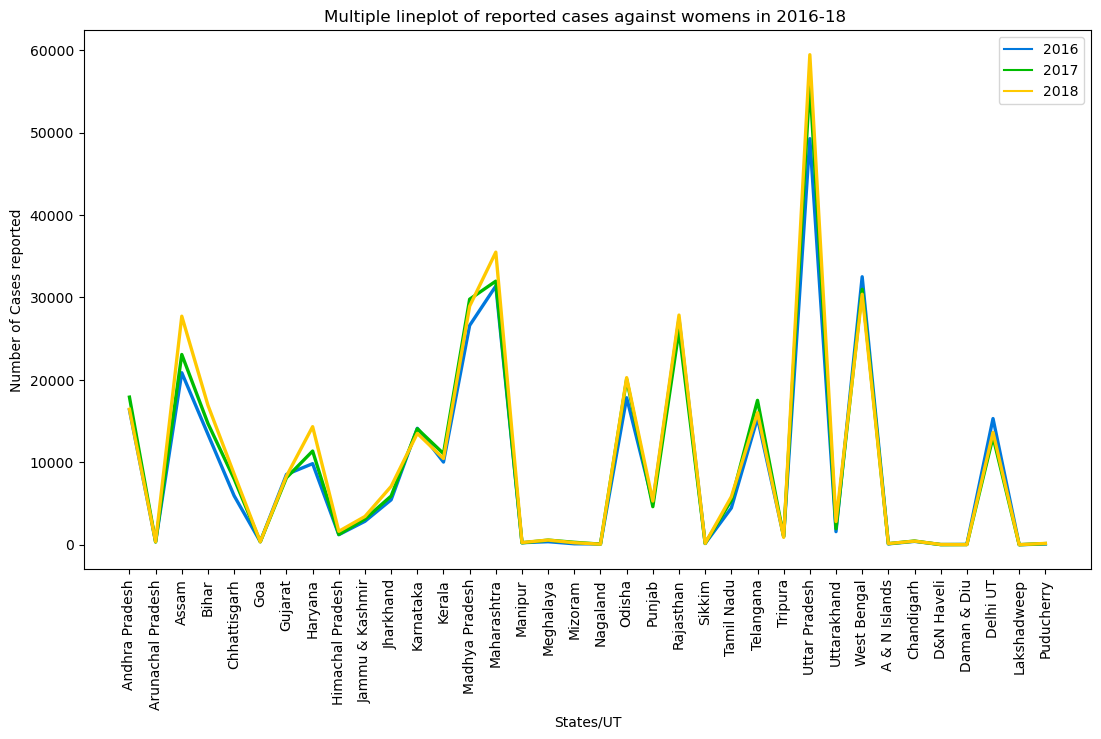

In [6]:
data1= CrimeAgainstWomen[['State/UT','2016','2017','2018']]
data1.set_index('State/UT', inplace=True)
plt.figure(figsize=(13,7))
sns.lineplot(data1,palette='nipy_spectral',linewidth=2.4,dashes=False)

plt.title('Multiple lineplot of reported cases against womens in 2016-18 ')
plt.xlabel('States/UT')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases reported')
plt.legend()
plt.show()

* We can observe that mostly the data remains same during the period 2016 2017 2018, and West Bengal tops all three years with maximum no. of Crime  against women
* 

**Q) Are there regional patterns or clusters of higher or lower crime rates?(NSEW)**

In [7]:
print(Non_custodial_rape['State/UT'].tolist())

['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli', 'Delhi', 'Jammu & Kashmir', 'Lakshadweep', 'Puducherry']


In [8]:
central_india_new = ['Madhya Pradesh', 'Chhattisgarh']
west_india_new = ['D&N Haveli','Rajasthan', 'Gujarat', 'Maharashtra', 'Goa']
east_india_new = ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Assam', 'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya']
south_india_new = ['Lakshadweep','Puducherry','A&N Islands','Andhra Pradesh', 'Telangana', 'Karnataka', 'Tamil Nadu', 'Kerala']
north_india_new = ['Jammu & Kashmir','Chandigarh','Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Delhi']
for i in range(len(central_india_new)):
    central_india_new[i]=central_india_new[i].strip()
for i in range(len(west_india_new)):
    west_india_new[i]=west_india_new[i].strip()
for i in range(len(east_india_new)):
    east_india_new[i]=east_india_new[i].strip()
for i in range(len(south_india_new)):
    south_india_new[i]=south_india_new[i].strip()
for i in range(len(north_india_new)):
    north_india_new[i]=north_india_new[i].strip()

region_mapping_new = {
    **{state: 'North' for state in north_india_new},
    **{state: 'South' for state in south_india_new},
    **{state: 'East' for state in east_india_new},
    **{state: 'West' for state in west_india_new},
    **{state: 'Central' for state in central_india_new}
}

In [9]:
central_india = ['Madhya Pradesh ', 'Chhattisgarh ']
west_india = ['Rajasthan ', 'Gujarat ', 'Maharashtra ', 'Goa ']
east_india = ['Bihar ', 'Jharkhand ', 'Odisha ', 'West Bengal ', 'Sikkim ', 'Assam ', 'Arunachal Pradesh ', 'Nagaland ', 'Manipur ', 'Mizoram ', 'Tripura ', 'Meghalaya']
south_india = ['Andhra Pradesh ', 'Telangana ', 'Karnataka ', 'Tamil Nadu ', 'Kerala ']
north_india = ['Jammu & Kashmir ', 'Himachal Pradesh ', 'Punjab ', 'Haryana ', 'Uttarakhand ', 'Uttar Pradesh ', 'Delhi UT ']
for i in range(len(central_india)):
    central_india[i]=central_india[i].strip()
for i in range(len(west_india)):
    west_india[i]=west_india[i].strip()
for i in range(len(east_india)):
    east_india[i]=east_india[i].strip()
for i in range(len(south_india)):
    south_india[i]=south_india[i].strip()
for i in range(len(north_india)):
    north_india[i]=north_india[i].strip()

region_mapping = {
    **{state: 'North' for state in north_india},
    **{state: 'South' for state in south_india},
    **{state: 'East' for state in east_india},
    **{state: 'West' for state in west_india},
    **{state: 'Central' for state in central_india}
}

In [10]:
print(CrimeAgainstWomen['State/UT'].tolist())

['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry']


Text(0.5, 1.0, 'Region v.s 2018')

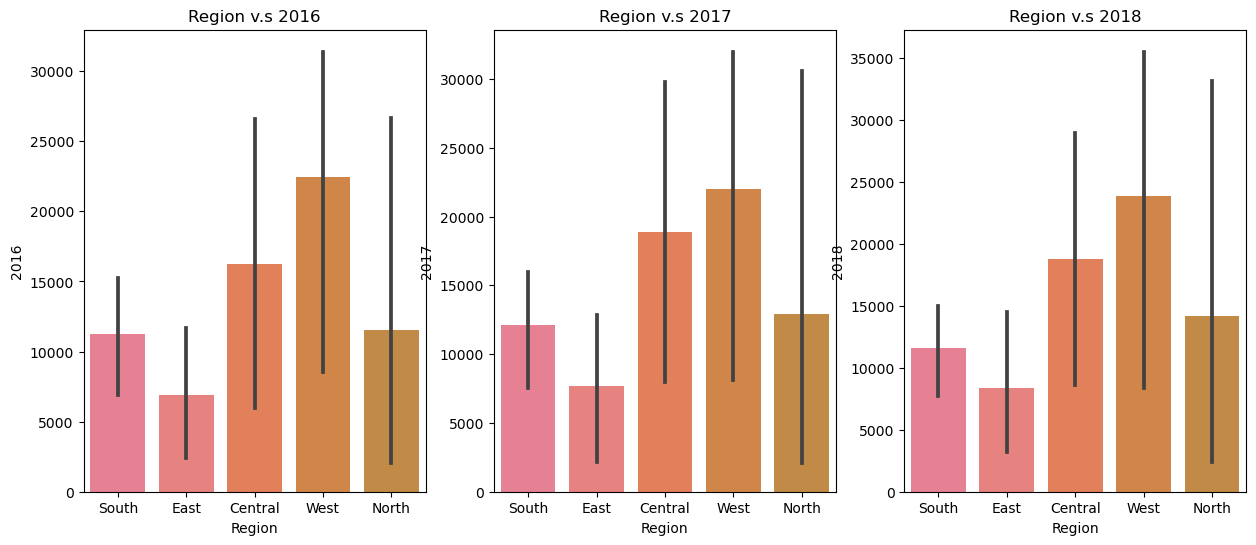

In [24]:
CrimeAgainstWomen['Region'] = CrimeAgainstWomen['State/UT'].map(region_mapping)

custom_palette = sns.color_palette('husl', len(CrimeAgainstWomen['Region']))
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(CrimeAgainstWomen, x="Region", y="2016", ax=axes[0], palette=custom_palette)
axes[0].set_title("Region v.s 2016")
sns.barplot(CrimeAgainstWomen, x="Region", y="2017", ax=axes[1], palette=custom_palette)
axes[1].set_title("Region v.s 2017")
sns.barplot(CrimeAgainstWomen, x="Region", y="2018", ax=axes[2], palette=custom_palette)
axes[2].set_title("Region v.s 2018")

**Q) How do changes in population relate to changes in crime rates?(population data for each state for 2016-17-18)**

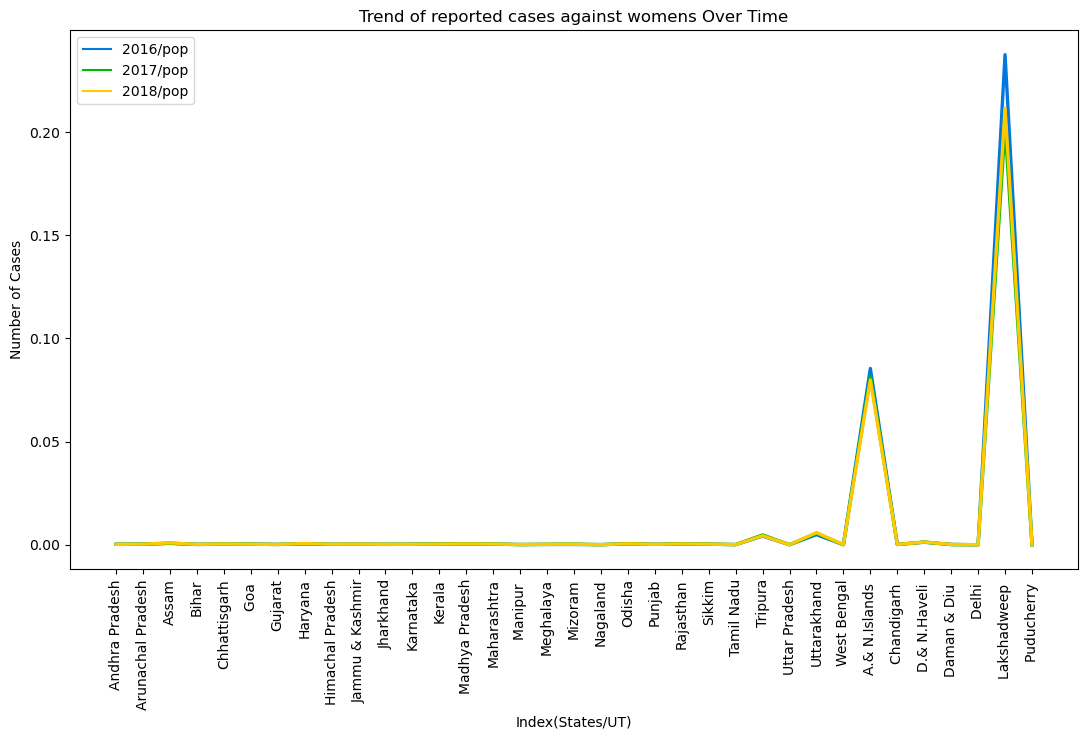

In [12]:
len(Population_Dsitribution_statewise['State/UT'].to_list())
CrimeAgainstWomen_population = CrimeAgainstWomen
#CrimeAgainstWomen_population.drop(35,inplace=True)
CrimeAgainstWomen_population['State/UT'] = Population_Dsitribution_statewise['State/UT']
CrimeAgainstWomen_population = pd.merge(CrimeAgainstWomen_population,Population_Dsitribution_statewise,on='State/UT',how='inner')
CrimeAgainstWomen_population['2016/pop'] = CrimeAgainstWomen_population['2016']/CrimeAgainstWomen_population['Total Population']
CrimeAgainstWomen_population['2017/pop'] = CrimeAgainstWomen_population['2017']/CrimeAgainstWomen_population['Total Population']
CrimeAgainstWomen_population['2018/pop'] = CrimeAgainstWomen_population['2018']/CrimeAgainstWomen_population['Total Population']

data2= CrimeAgainstWomen_population[['State/UT','2016/pop','2017/pop','2018/pop']]
data2.set_index('State/UT', inplace=True)
plt.figure(figsize=(13,7))
sns.lineplot(data2,palette='nipy_spectral',linewidth=2.4,dashes=False)

plt.title('Trend of reported cases against womens Over Time')
plt.xlabel('Index(States/UT)')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

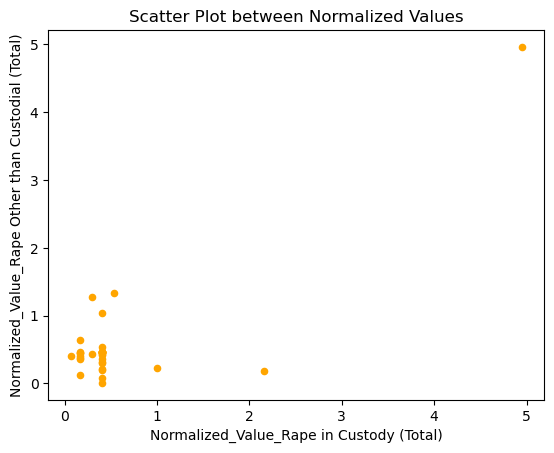

In [13]:
data = pd.merge(Custodial_rape[["State/UT","Rape in Custody (Total)"]], Non_custodial_rape[["State/UT","Rape Other than Custodial (Total)"]], on='State/UT')
data['Normalized_Value_Rape in Custody (Total)'] = abs((data['Rape in Custody (Total)'] - data['Rape in Custody (Total)'].mean()) / data['Rape in Custody (Total)'].std())
data['Normalized_Value_Rape Other than Custodial (Total)'] = abs((data['Rape Other than Custodial (Total)'] - data['Rape Other than Custodial (Total)'].mean()) / data['Rape Other than Custodial (Total)'].std())
plt.figure(figsize=(8, 6))
data.plot.scatter(x='Normalized_Value_Rape in Custody (Total)', y='Normalized_Value_Rape Other than Custodial (Total)', c='orange', marker='o')
plt.title('Scatter Plot between Normalized Values')
plt.xlabel('Normalized_Value_Rape in Custody (Total)')
plt.ylabel('Normalized_Value_Rape Other than Custodial (Total)')
plt.show()

<h5> Relation between 

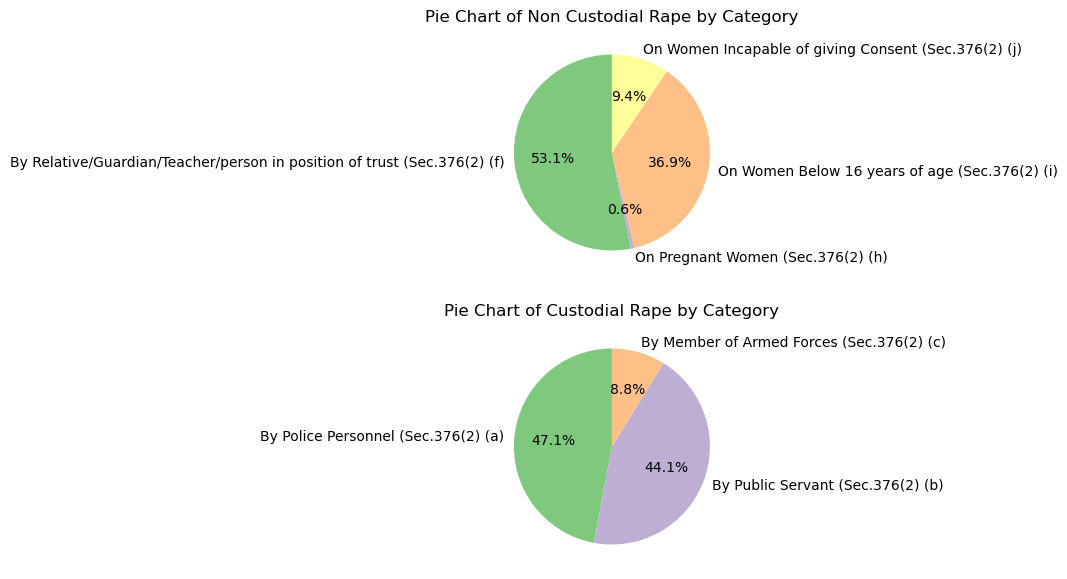

<Figure size 800x800 with 0 Axes>

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
pie_data1=Non_custodial_rape[['By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)','On Pregnant Women (Sec.376(2) (h)','On Women Below 16 years of age (Sec.376(2) (i)','On Women Incapable of giving Consent (Sec.376(2) (j)']]
pie_data2=Custodial_rape[['By Police Personnel (Sec.376(2) (a)','By Public Servant (Sec.376(2) (b)','By Member of Armed Forces (Sec.376(2) (c)']]
custom_palette = sns.color_palette("Accent", len(pie_data1))
plt.figure(figsize=(8, 8))
axes[0].pie(pie_data1.sum(),autopct='%1.1f%%', startangle=90,colors=custom_palette,labels=pie_data1.transpose().index)
axes[0].set_title('Pie Chart of Non Custodial Rape by Category')
axes[1].pie(pie_data2.sum(),autopct='%1.1f%%', startangle=90,colors=custom_palette,labels=pie_data2.transpose().index)
axes[1].set_title('Pie Chart of Custodial Rape by Category')
plt.tight_layout() 
plt.show()



In [15]:
Non_custodial_rape_stacked_bar = Non_custodial_rape
Non_custodial_rape['Region'] = Non_custodial_rape_stacked_bar['State/UT'].map(region_mapping_new)
Non_custodial_rape_stacked_bar

,State/UT,Rape Other than Custodial (Total),By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f),On Pregnant Women (Sec.376(2) (h),On Women Below 16 years of age (Sec.376(2) (i),On Women Incapable of giving Consent (Sec.376(2) (j),By Persons in Control or Dominance over women (Sec.376(2) (k),On Women with Mental or Physical disability (Sec.376(2)(l),Endanger life of Women after Rape (Sec.376(2)(m),Repeated Rape on same women (Sec.376(2)(n),Other Custodial Rapes,Punishment upto 20 years extended to life for Rape (Below 16 Yrs) (Sec.376(3)),Punishment for causing Death (Sec.376(A)),Region
0,Andhra Pradesh,297,19,0,108,0,1,9,0,79,81,59,1,South
1,Arunachal Pradesh,22,4,0,15,1,0,1,0,1,0,0,0,East
2,Assam,148,90,0,10,0,43,0,0,0,5,0,0,East
3,Bihar,17,11,0,0,0,0,2,0,1,3,0,0,East
4,Chhattisgarh,743,340,0,354,30,0,2,0,17,0,10,5,Central
5,Goa,3,2,0,1,0,0,0,0,0,0,1,0,West
6,Gujarat,47,9,0,0,2,0,3,3,30,0,0,1,West
7,Haryana,196,11,0,0,0,0,1,0,183,1,1,14,North
8,Himachal Pradesh,71,43,1,25,0,0,1,0,1,0,10,0,North
9,Jharkhand,110,49,0,0,0,0,0,0,61,0,0,0,East


In [16]:
Non_custodial_rape = Non_custodial_rape.reset_index(drop=True)

Mapping non custodials data attributes with the states

In [25]:
f1 = ['By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)']
f2 = ['On Women Below 16 years of age (Sec.376(2) (i)']
f3 = ['By Persons in Control or Dominance over women (Sec.376(2) (k)']
f4 = ['Repeated Rape on same women (Sec.376(2)(n)']

feature_mapping_non_custodial_2018 = {
    **{feature: 'Relative/Guardian/Teacher/trusted_person' for feature in f1},
    **{feature: 'Women_below_16' for feature in f2},
    **{feature: 'By_Dominance' for feature in f3},
    **{feature: 'Repeated_rape_on_same_victim' for feature in f4},
}


Non_custodial_rape['Region'] = Non_custodial_rape_stacked_bar['State/UT'].map(region_mapping_new)

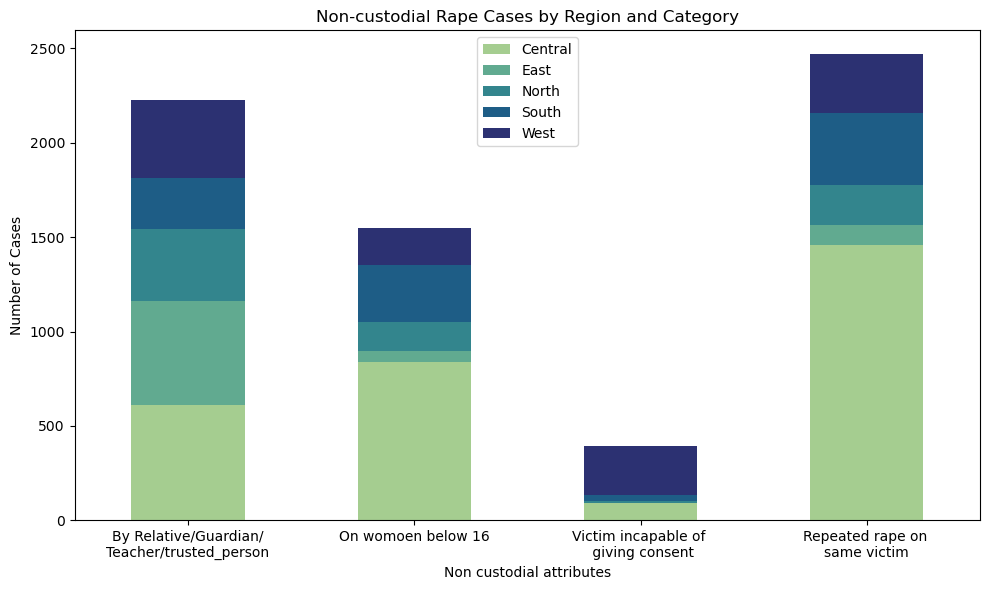

In [ ]:
agg_non_custodial_rape = Non_custodial_rape.pivot_table(index='Region', values=['By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)', 'On Women Incapable of giving Consent (Sec.376(2) (j)', 'Repeated Rape on same women (Sec.376(2)(n)','On Women Below 16 years of age (Sec.376(2) (i)'], aggfunc='sum')
transposed_agg_non_custodial_rape = agg_non_custodial_rape.T

ax = transposed_agg_non_custodial_rape.plot(kind='bar', stacked=True, figsize=(10, 6),colormap='crest')
custom_labels = ['By Relative/Guardian/\nTeacher/trusted_person','On womoen below 16','Victim incapable of \n giving consent','Repeated rape on \nsame victim']

plt.xlabel('Non custodial attributes')
plt.ylabel('Number of Cases')
plt.title('Non-custodial Rape Cases by Region and Category')
plt.xticks(range(len(custom_labels)), custom_labels, rotation=0, ha='center')
plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

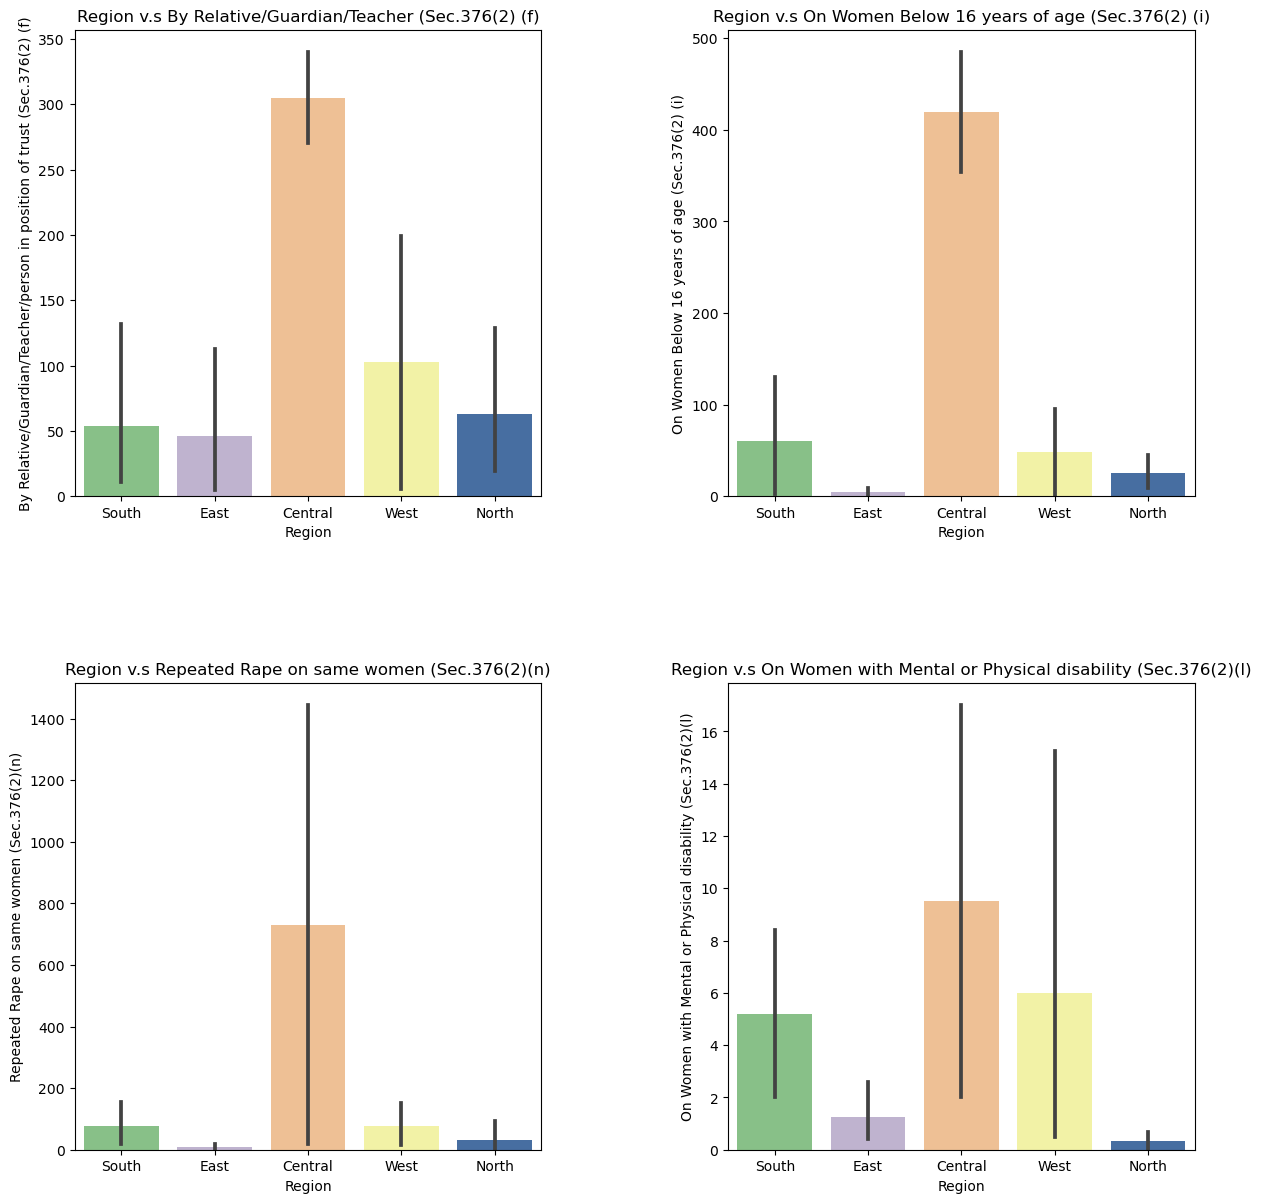

In [ ]:

vibrant_palette = sns.color_palette('husl', len(Non_custodial_rape['Region']))
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

sns.barplot(Non_custodial_rape, x="Region", y="By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)", ax=axes[0,0], palette=custom_palette)
axes[0,0].set_title("Region v.s By Relative/Guardian/Teacher (Sec.376(2) (f)")
sns.barplot(Non_custodial_rape, x="Region", y="On Women Below 16 years of age (Sec.376(2) (i)", ax=axes[0,1], palette=custom_palette)
axes[0,1].set_title("Region v.s On Women Below 16 years of age (Sec.376(2) (i)")
sns.barplot(Non_custodial_rape, x="Region", y="Repeated Rape on same women (Sec.376(2)(n)", ax=axes[1,0], palette=custom_palette)
axes[1,0].set_title("Region v.s Repeated Rape on same women (Sec.376(2)(n)")
sns.barplot(Non_custodial_rape, x="Region", y="On Women with Mental or Physical disability (Sec.376(2)(l)", ax=axes[1,1], palette=custom_palette)
axes[1,1].set_title("Region v.s On Women with Mental or Physical disability (Sec.376(2)(l)")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

In [26]:
Police_Disposal_CrimeHead_Wise_2018.describe()

,Cases Pending Investigation from Previous Year,Cases Reported during the year,Cases Reopened for Investigation,Total Cases for Investigation,Cases Not Investigated Under 157_1_b CRPC,Cases True but Insufficient Evidence or Untraced or No Clue,Cases Abated during Investigation,Total,Cases Charge_sheeted Out of Cases from Previous Year,Cases Charge_sheeted Out of Cases during the Year,Cases Charge_sheeted
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,5426.400000,13835.800000,7.60000,19268.600000,1.800000,356.800000,27.600000,1296.000000,2896.80000,9256.600000,12150.400000
std,5760.502131,14257.038234,8.38451,20013.450809,2.949576,440.141682,30.843152,2018.977464,3020.36218,9334.849827,12354.314076
min,3.000000,4.000000,0.00000,6.000000,0.000000,13.000000,2.000000,15.000000,16.00000,17.000000,18.000000
25%,99.000000,294.000000,2.00000,393.000000,0.000000,24.000000,5.000000,33.000000,31.00000,193.000000,224.000000
50%,5507.000000,14124.000000,5.00000,19641.000000,1.000000,294.000000,14.000000,774.000000,2845.00000,9652.000000,12497.000000
75%,7761.000000,21401.000000,10.00000,29164.000000,1.000000,360.000000,42.000000,817.000000,4538.00000,15006.000000,19544.000000
max,13762.000000,33356.000000,21.00000,47139.000000,7.000000,1093.000000,75.000000,4841.000000,7054.00000,21415.000000,28469.000000


In [27]:
punished_rapists.describe()

,By Seperated husband (Sec.376 (B)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA)),By Person in Authority (Sec.376 (C)),Gang Rape (Sec.376(D)),Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB)),Punishment for Repeat offenders (Sec.376(E)),Rape (Total) (Sec.376 IPC)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1.055556,3.916667,1.694444,50.722222,0.916667,3.916667,5.916667,926.555556
std,2.551688,9.717069,5.989607,124.315408,2.234470,10.321614,23.656319,1291.949567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.750000
50%,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,522.500000
75%,1.000000,5.000000,1.000000,25.250000,0.000000,1.250000,0.000000,1121.250000
max,14.000000,56.000000,35.000000,556.000000,9.000000,51.000000,132.000000,5433.000000


In [28]:
Rape_under_Different_age_groups_2018.describe()

,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),60 Years & Above,Total Women / Adult Victims(Above 18),Total Victims
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,953.028571,8.028571,21.628571,103.314286,136.542857,269.514286,503.885714,174.514286,20.771429,2.085714,701.257143,970.771429
std,1300.866736,17.076791,43.781601,236.630734,303.679624,591.773773,624.372521,231.327800,31.486772,3.484178,876.641967,1331.902158
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
25%,64.000000,0.000000,0.000000,1.000000,1.500000,3.500000,23.500000,10.000000,1.500000,0.000000,34.000000,65.500000
50%,553.000000,0.000000,1.000000,6.000000,10.000000,23.000000,369.000000,101.000000,7.000000,1.000000,468.000000,553.000000
75%,1152.500000,5.500000,18.500000,50.000000,73.500000,142.500000,767.000000,255.500000,18.500000,2.500000,957.500000,1157.500000
max,5433.000000,67.000000,174.000000,1143.000000,1502.000000,2841.000000,2263.000000,912.000000,129.000000,14.000000,3305.000000,5450.000000


In [29]:
RapeCommited_I_V.describe()

,Rape (Total)(I),Rape (Total)(V),Women (18 Yrs. And above)(I),Women (18 Yrs. And above)(V),Girls (Below 18 yrs)(I),Girls (Below 18 yrs)(V)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,926.555556,943.805556,667.888889,681.777778,258.666667,262.027778
std,1291.949567,1322.670174,845.475987,871.896787,579.384156,584.985738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.750000,58.750000,31.500000,31.500000,2.750000,2.750000
50%,522.500000,525.000000,396.500000,397.000000,20.000000,20.000000
75%,1121.250000,1127.750000,916.000000,921.750000,114.500000,115.750000
max,5433.000000,5450.000000,3305.000000,3305.000000,2830.000000,2841.000000


**Q) What is the difference between "Rape (Total)(I)" and "Rape (Total)(V)"? How do these two categories relate to each other?**

I siginifies the no. of incidents and V means no.of victims.

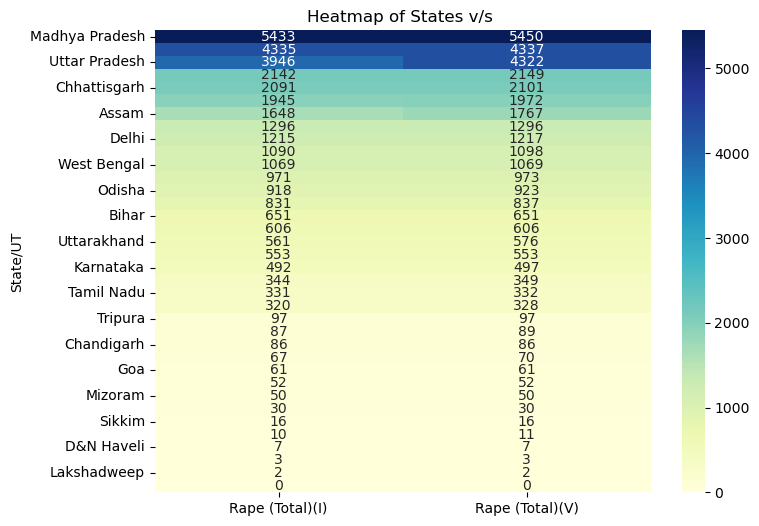

In [30]:
data=RapeCommited_I_V[["State/UT","Rape (Total)(I)","Rape (Total)(V)"]].sort_values('Rape (Total)(V)',ascending=False).set_index('State/UT')
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='YlGnBu', fmt='g',)
plt.title('Heatmap of States v/s ')
plt.show()

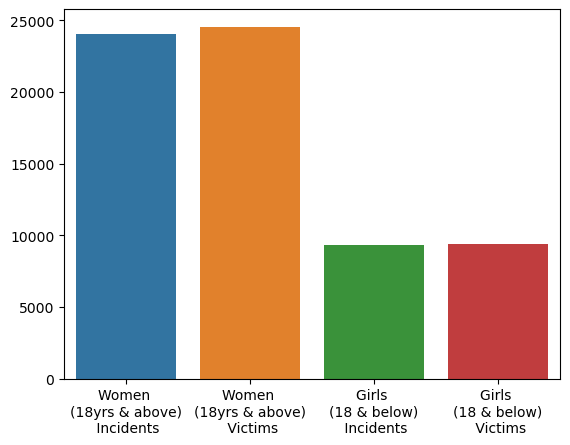

In [35]:
data=RapeCommited_I_V.drop(columns=["Rape (Total)(I)","Rape (Total)(V)"]).sum()
data=data.to_frame()
data=data.iloc[1:]
custom_labels_new=['Women \n(18yrs & above)\n Incidents','Women \n(18yrs & above)\n Victims','Girls \n(18 & below)\n Incidents','Girls \n(18 & below)\n Victims']
sns.barplot(data.transpose(),)
plt.xticks(range(len(custom_labels_new)), custom_labels_new,rotation=0)
plt.show()

As We can see the total no. of victims is greater than total no. of incidences. Hence in each incident no. of vicims were >= 1.
And no. of (18 yrs And Above) 2.5 times the (Below 18 yrs).

In [36]:
Rapist_Victim_relation.describe()

,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,870.000000,77.222222,443.666667,349.111111,56.555556,926.555556
std,1205.161661,117.658856,637.630300,483.048875,111.734493,1291.949567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.250000,4.000000,30.000000,18.250000,2.750000,58.750000
50%,455.500000,20.000000,205.500000,144.000000,8.000000,522.500000
75%,1059.750000,122.750000,567.750000,449.750000,59.250000,1121.250000
max,5209.000000,553.000000,2543.000000,2113.000000,587.000000,5433.000000


In [ ]:
states= Rapist_Victim_relation["State/UT"].tolist()
for i in range(len(states)):
    states[i]=states[i].strip()
states
Rapist_Victim_relation["State/UT"]=pd.Series(states)

Using **Inter-quantile range** to detect the outliers.

In [37]:
Q1 = Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'].quantile(0.25)
Q3 = Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'] < lower_bound) | (Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'] > upper_bound)
Rapist_Victim_relation[outliers].sort_values(by='Total Rape Cases (Known+unknown Offenders)', ascending=False)

,State/UT,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders),Percentage Share of Known Cases to Total Rape Cases
13,Madhya Pradesh,5209,553,2543,2113,224,5433,95.9
21,Rajasthan,3748,298,2193,1257,587,4335,86.5
26,Uttar Pradesh,3718,287,2121,1310,228,3946,94.2


**Q) Are there any trends or patterns in the cases involving family friends, neighbors, employers, or other known persons?**

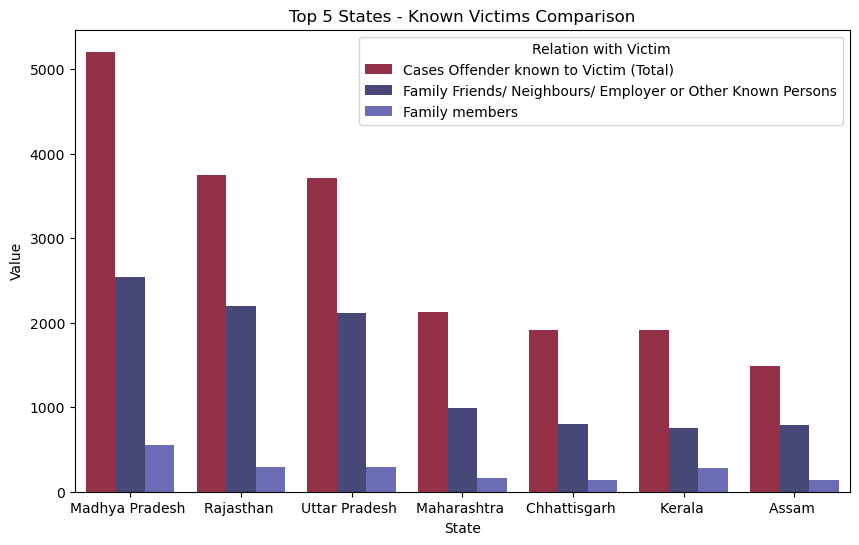

In [38]:
data = Rapist_Victim_relation.sort_values(by="Cases Offender known to Victim (Total)", ascending=False)
data = data.head(7)
data= data[['State/UT', 'Cases Offender known to Victim (Total)', 'Family Friends/ Neighbours/ Employer or Other Known Persons','Family members']]
melted_data = pd.melt(data, id_vars=['State/UT'], var_name='Attribute', value_name='Value')

vibrant_palette = sns.color_palette('gist_stern', len(data['State/UT']))

plt.figure(figsize=(10, 6))
sns.barplot(x='State/UT', y='Value', hue='Attribute', data=melted_data, palette=vibrant_palette)
plt.title('Top 5 States - Known Victims Comparison')
plt.ylabel('Value')
plt.xlabel('State')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Relation with Victim')
plt.show()

In [39]:
percentage_data = pd.DataFrame()

# Calculate the percentages
new_data = Rapist_Victim_relation.sort_values(by="Cases Offender known to Victim (Total)", ascending=False)
percentage_data['State/UT'] = new_data['State/UT']
percentage_data['Family Members Percentage'] = (new_data['Family members'] / new_data['Cases Offender known to Victim (Total)']) * 100
percentage_data['Family Friends Percentage'] = (new_data['Family Friends/ Neighbours/ Employer or Other Known Persons'] / new_data['Cases Offender known to Victim (Total)']) * 100
percentage_data['Total Percentage'] = ((new_data['Family members']+new_data['Family Friends/ Neighbours/ Employer or Other Known Persons'])/new_data['Cases Offender known to Victim (Total)']) * 100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


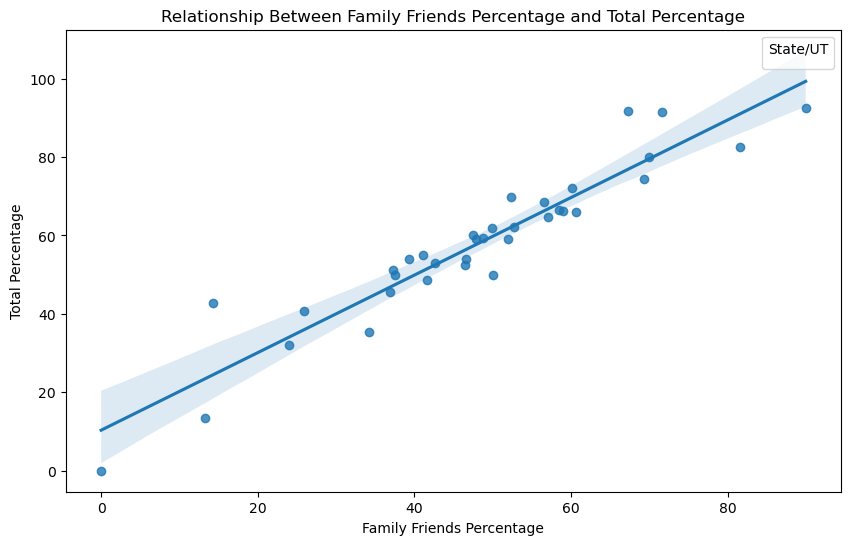

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Family Friends Percentage', y='Total Percentage', data=percentage_data,)
plt.title('Relationship Between Family Friends Percentage and Total Percentage')
plt.xlabel('Family Friends Percentage')
plt.ylabel('Total Percentage')
plt.legend(title='State/UT', bbox_to_anchor=(1, 1))
plt.show()

**What is the percentage share of known offenders compared to cases where the offender is unknown or not identified?**

In [40]:
percentage_data['Known Offenders'] = (new_data['Cases Offender known to Victim (Total)'] / new_data['Total Rape Cases (Known+unknown Offenders)']) * 100
percentage_data['Unknown Offenders'] = (new_data['Cases Offenders Unknown or Not Identified'] / new_data['Total Rape Cases (Known+unknown Offenders)']) * 100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


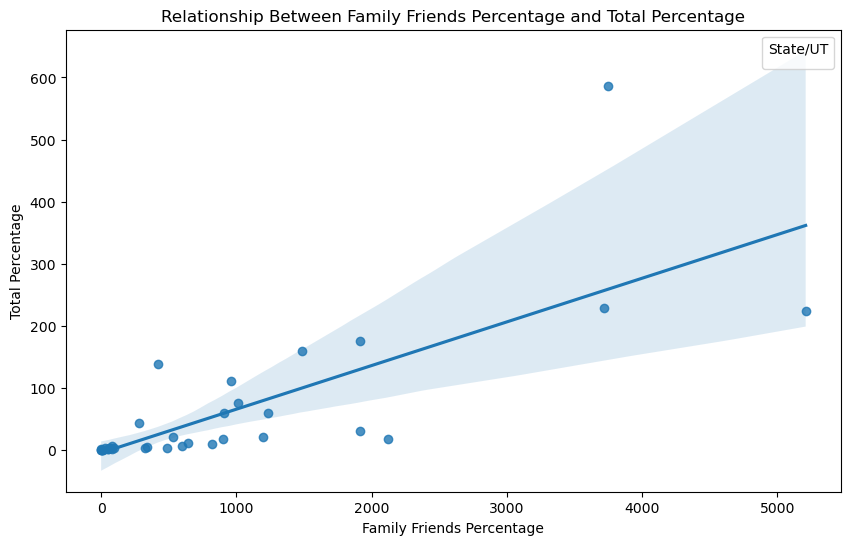

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Cases Offender known to Victim (Total)', y='Cases Offenders Unknown or Not Identified', data=new_data)
plt.title('Relationship Between Family Friends Percentage and Total Percentage')
plt.xlabel('Family Friends Percentage')
plt.ylabel('Total Percentage')
plt.legend(title='State/UT', bbox_to_anchor=(1, 1))
plt.show()

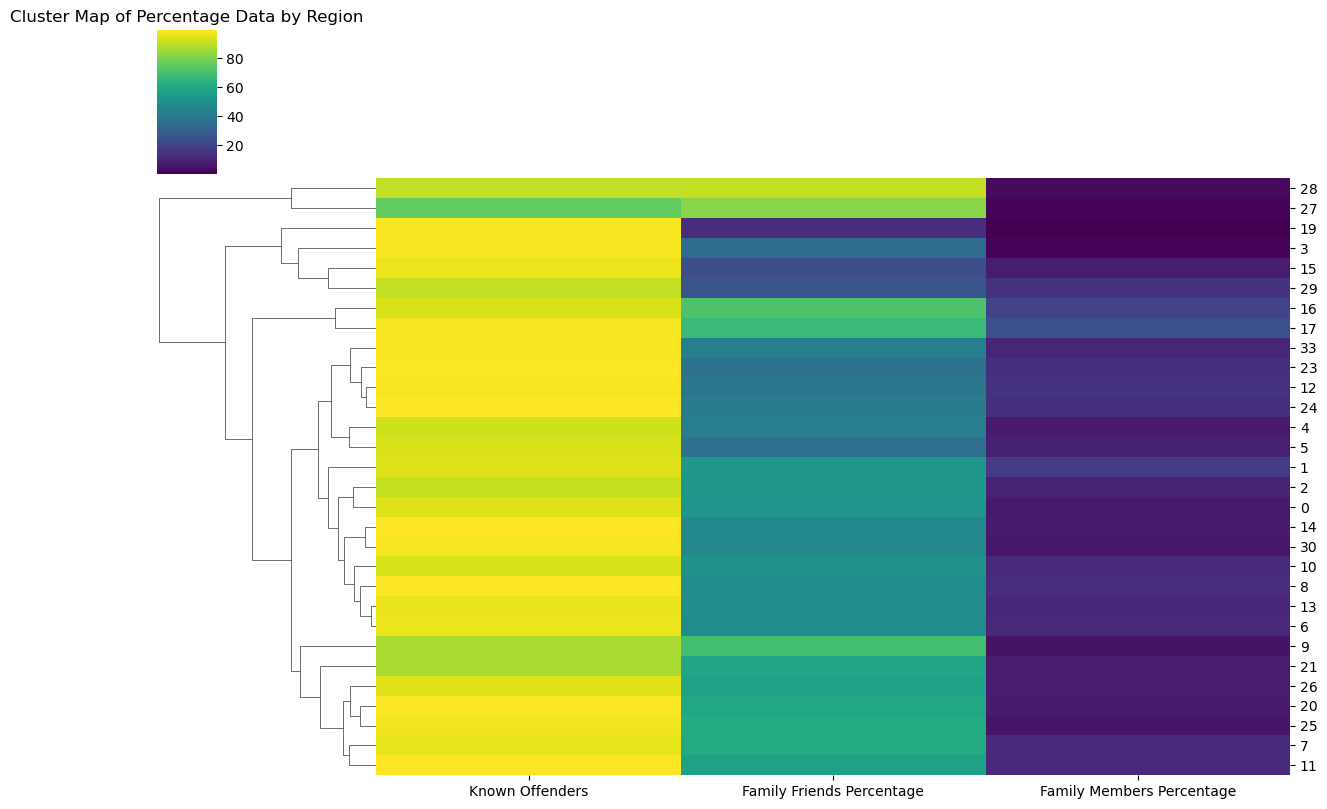

In [42]:
percentage_data['Region'] = percentage_data['State/UT'].map(region_mapping)

cluster_map = sns.clustermap(
    data=percentage_data[[ 'Known Offenders','Family Friends Percentage','Family Members Percentage']].head(30),
    col_cluster=False,
    row_cluster=True,
    cmap='viridis',
    method='average',
    figsize=(12, 8),
)

reordered_indices = cluster_map.dendrogram_row.reordered_ind
cluster_map.ax_row_dendrogram.set_yticks(range(len(reordered_indices)))
cluster_map.ax_row_dendrogram.set_yticklabels(percentage_data['Region'].iloc[reordered_indices], fontsize=8)


plt.title('Cluster Map of Percentage Data by Region')
plt.show()

**Is there a correlation between economic factors and the prevalence of different types of rape cases?**

In [43]:
percentage_data.dropna(inplace =True)

In [44]:
economy_data.rename(columns={"State":"State/UT"}, inplace=True)

In [45]:
percentage_data.merge(economy_data, on='State/UT')


,State/UT,Family Members Percentage,Family Friends Percentage,Total Percentage,Known Offenders,Unknown Offenders,Region,Rank,GDP per capita ($)
0,Meghalaya,19.753086,71.604938,91.358025,93.103448,6.896552,East,27,"1,417"


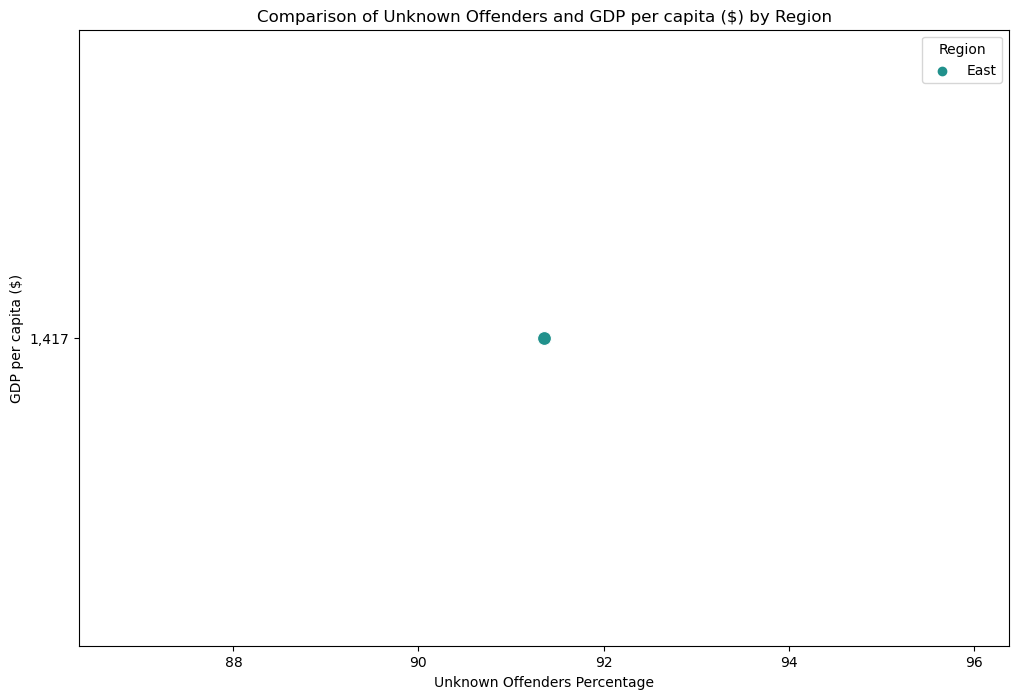

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Percentage', y='GDP per capita ($)', hue='Region', data=percentage_data.merge(economy_data, on='State/UT'), palette='viridis', s=100)
plt.title('Comparison of Unknown Offenders and GDP per capita ($) by Region')
plt.xlabel('Unknown Offenders Percentage')
plt.ylabel('GDP per capita ($)')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

In [47]:
punished_rapists.describe()

,By Seperated husband (Sec.376 (B)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA)),By Person in Authority (Sec.376 (C)),Gang Rape (Sec.376(D)),Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB)),Punishment for Repeat offenders (Sec.376(E)),Rape (Total) (Sec.376 IPC)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1.055556,3.916667,1.694444,50.722222,0.916667,3.916667,5.916667,926.555556
std,2.551688,9.717069,5.989607,124.315408,2.234470,10.321614,23.656319,1291.949567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.750000
50%,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,522.500000
75%,1.000000,5.000000,1.000000,25.250000,0.000000,1.250000,0.000000,1121.250000
max,14.000000,56.000000,35.000000,556.000000,9.000000,51.000000,132.000000,5433.000000


In [48]:
max_values = {}
for column in punished_rapists.columns[1:]:
    max_row = punished_rapists.loc[punished_rapists[column].idxmax()]
    state = max_row['State/UT']
    value = max_row[column]
    
    max_values[column] = {'State/UT': state, 'Max Value': value}

max_values_df = pd.DataFrame.from_dict(max_values, orient='index')
print("Table with the maximum value for each attribute and its corresponding state:")
print(max_values_df)


Table with the maximum value for each attribute and its corresponding state:
                                                          State/UT  Max Value
By Seperated husband (Sec.376 (B))                         Haryana         14
Rape/Gang Rape of Girl Below 16 Yrs (Imprisonme...  Madhya Pradesh         56
By Person in Authority (Sec.376 (C))                     Jharkhand         35
Gang Rape (Sec.376(D))                                   Rajasthan        556
Rape/Gang Rape of Girl Below 12 Yrs (Imprisonme...         Tripura          9
Rape/Gang Rape of Girl Below 16 Yrs (Imprisonme...       Rajasthan         51
Punishment for Repeat offenders (Sec.376(E))        Madhya Pradesh        132
Rape (Total) (Sec.376 IPC)                          Madhya Pradesh       5433


Plotting chloropleth map of India to potray number of gang rapes reported and rapes commited by seperated husband.

In [49]:
punished_rapists_df = punished_rapists
punished_rapists_df.rename(columns={"State/UT": "state"}, inplace=True)
geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"

fig1 = px.choropleth(
    punished_rapists_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='By Seperated husband (Sec.376 (B))',
    color_continuous_scale='picnic',
    hover_name='state'
)

fig2 = px.choropleth(
    punished_rapists_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='Gang Rape (Sec.376(D))',
    color_continuous_scale='piyg',
    hover_name='state'
)

fig1.update_geos(fitbounds="locations", visible=False)
fig2.update_geos(fitbounds="locations", visible=False)

fig1.show()
fig2.show()


<h4>Note:</h4>
<p>The GeoJSON file utilized in this visualization may not be entirely compatible with our dataset, leading to the absence of some states on the map. Please be aware that this discrepancy is due to differences in state names or other factors between the GeoJSON file and our dataset.<br><b> Our intention is solely to provide a visual representation based on the available data, and we appreciate your understanding.</p>


In [50]:
Disposal_CrimeHead_Wise_2018.describe()

,Persons Arrested Male,Persons Arrested Female,Persons Arrested Total,Persons Chargesheeted Male,Persons Chargesheeted Female,Persons Chargesheeted Total,Persons Convicted Male,Persons Convicted Female,Persons Convicted Total,Persons Discharged Male,Persons Discharged Female,Persons Discharged Total,Persons Acquitted Male,Persons Acquitted Female,Persons Acquitted Total
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,16651.600000,335.800000,16987.000000,15350.60000,278.200000,15627.800000,2184.200000,17.200000,2199.800000,501.800000,8.400000,508.000000,4427.400000,65.600000,4490.200000
std,17158.236238,395.281166,17541.130594,15716.89999,334.954773,16040.701705,2454.998106,18.633304,2474.343489,847.439791,11.148991,858.421517,5875.406607,89.491899,5965.978981
min,3.000000,4.000000,5.000000,6.00000,7.000000,8.000000,9.000000,0.000000,11.000000,1.000000,0.000000,1.000000,15.000000,2.000000,17.000000
25%,409.000000,14.000000,423.000000,332.00000,12.000000,344.000000,36.000000,8.000000,36.000000,12.000000,1.000000,14.000000,31.000000,10.000000,33.000000
50%,16980.000000,164.000000,17144.000000,16005.00000,131.000000,16136.000000,1918.000000,10.000000,1926.000000,144.000000,2.000000,145.000000,2581.000000,16.000000,2591.000000
75%,25641.000000,605.000000,26246.000000,23673.00000,465.000000,24138.000000,3037.000000,20.000000,3057.000000,356.000000,13.000000,358.000000,5333.000000,86.000000,5419.000000
max,40225.000000,892.000000,41117.000000,36737.00000,776.000000,37513.000000,5921.000000,48.000000,5969.000000,1996.000000,26.000000,2022.000000,14177.000000,214.000000,14391.000000


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



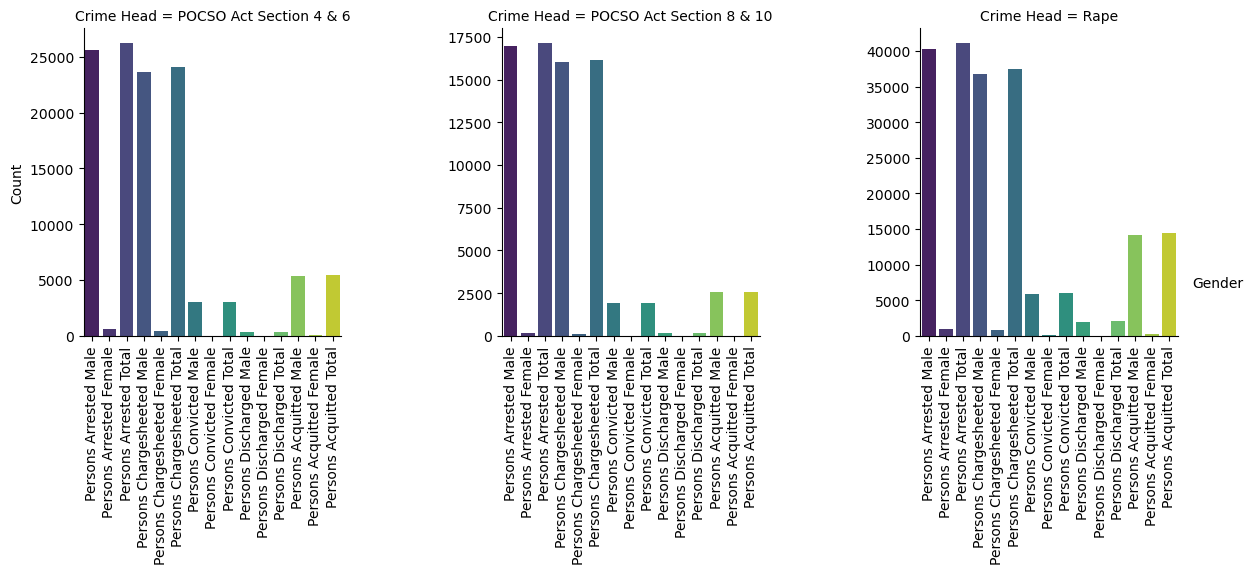

In [51]:
crime_head_categories = ["POCSO Act Section 4 & 6", "POCSO Act Section 8 & 10", "Rape"]

filtered_data = Disposal_CrimeHead_Wise_2018[Disposal_CrimeHead_Wise_2018['Crime Head'].isin(crime_head_categories)]

melted_data = pd.melt(filtered_data, id_vars=['Crime Head'], var_name='Gender', value_name='Count')

g = sns.FacetGrid(melted_data, col='Crime Head', col_wrap=3, height=4, sharey=False)

g.map(sns.barplot, 'Gender', 'Count', hue_order=['Persons Arrested Male', 'Persons Arrested Female',
                                                  'Persons Chargesheeted Male', 'Persons Chargesheeted Female',
                                                  'Persons Convicted Male', 'Persons Convicted Female',
                                                  'Persons Discharged Male', 'Persons Discharged Female',
                                                  'Persons Acquitted Male', 'Persons Acquitted Female']
                                                  , palette='viridis')

g.set_axis_labels("", "Count")
g.add_legend(title="Gender")
g.set_xticklabels(rotation=90)
plt.show()


In [52]:
Rape_under_Different_age_groups_2018.describe()

,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),60 Years & Above,Total Women / Adult Victims(Above 18),Total Victims
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,953.028571,8.028571,21.628571,103.314286,136.542857,269.514286,503.885714,174.514286,20.771429,2.085714,701.257143,970.771429
std,1300.866736,17.076791,43.781601,236.630734,303.679624,591.773773,624.372521,231.327800,31.486772,3.484178,876.641967,1331.902158
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
25%,64.000000,0.000000,0.000000,1.000000,1.500000,3.500000,23.500000,10.000000,1.500000,0.000000,34.000000,65.500000
50%,553.000000,0.000000,1.000000,6.000000,10.000000,23.000000,369.000000,101.000000,7.000000,1.000000,468.000000,553.000000
75%,1152.500000,5.500000,18.500000,50.000000,73.500000,142.500000,767.000000,255.500000,18.500000,2.500000,957.500000,1157.500000
max,5433.000000,67.000000,174.000000,1143.000000,1502.000000,2841.000000,2263.000000,912.000000,129.000000,14.000000,3305.000000,5450.000000


In [54]:
sorted_age_group_df = Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False)

In [55]:
sorted_age_group_df['Below_18'] = sorted_age_group_df['Below 6 Years '] + sorted_age_group_df['6 Years & Above (Below 12 Years) '] + sorted_age_group_df['12 Years & Above(Below 16 Years)'] + sorted_age_group_df['16 Years & Above(Below 18 Years )']
sorted_age_group_df['18_to_45'] = sorted_age_group_df['18 Years & Above( Below 30 Years )'] + sorted_age_group_df['30 Years & Above (Below 45 Years)']
sorted_age_group_df['45_and_above'] = sorted_age_group_df['45 Years & Above(Below 60 Years)'] + sorted_age_group_df['60 Years & Above ']

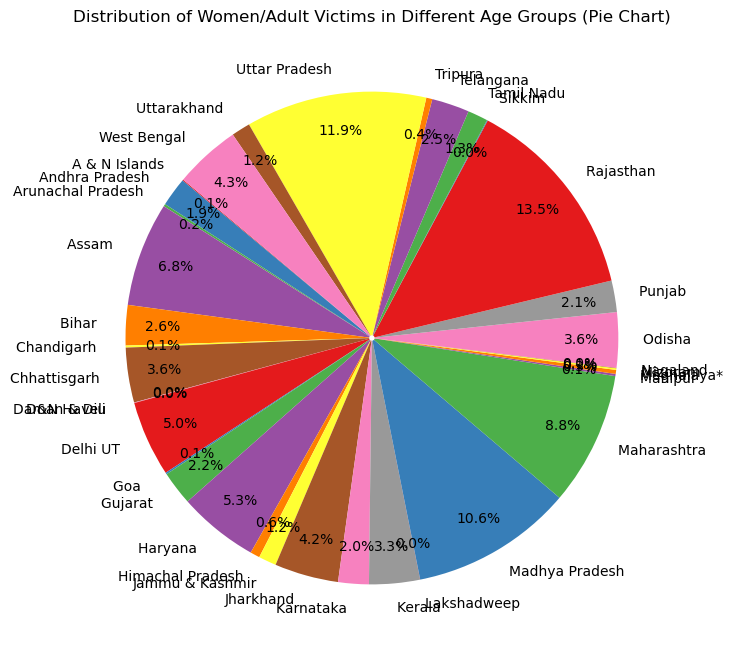

In [56]:
age_group_columns = ['State/UT ', '18 Years & Above( Below 30 Years )', '30 Years & Above (Below 45 Years)',
                      '45 Years & Above(Below 60 Years)', '60 Years & Above ', 'Total Women / Adult Victims(Above 18)']

age_group_data = Rape_under_Different_age_groups_2018[age_group_columns]

age_group_distribution = age_group_data.groupby('State/UT ').sum()

custom_palette = sns.color_palette("Set1", len(age_group_distribution))

plt.figure(figsize=(12, 8))
plt.pie(age_group_distribution['Total Women / Adult Victims(Above 18)'],
        labels=age_group_distribution.index,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=140,
        pctdistance=0.85,
        colors=custom_palette)

plt.gca().add_artist(plt.Circle((0, 0), 0.011, fc='white'))

plt.title('Distribution of Women/Adult Victims in Different Age Groups (Pie Chart)')
plt.show()


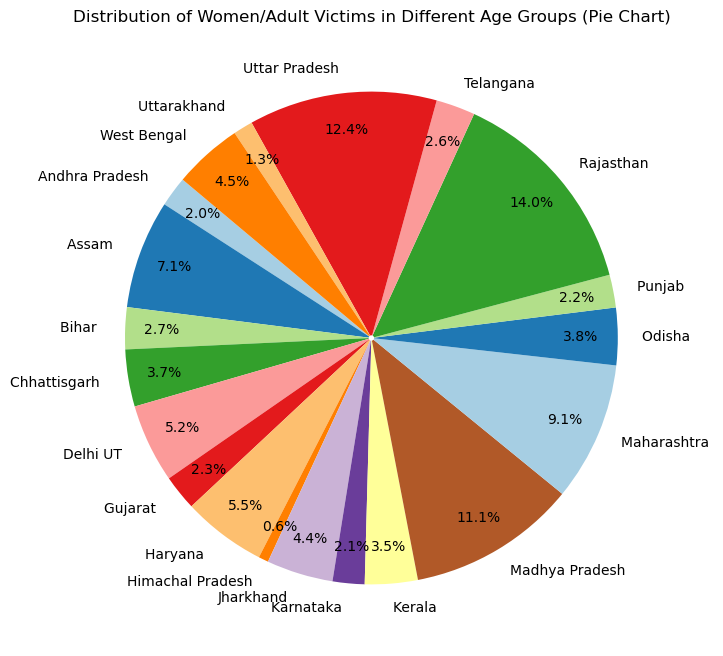

In [57]:
#Pie chart
age_group_data = Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False)
# Calculate the distribution of women/adult victims in different age groups
age_group_data = age_group_data.head(20)
age_group_distribution = age_group_data.groupby('State/UT ').sum()

# Define a custom color palette
custom_palette = sns.color_palette("Paired", len(age_group_distribution))

# Plot a pie chart with custom colors and adjusted percentage position
plt.figure(figsize=(12, 8))
plt.pie(age_group_distribution['Total Women / Adult Victims(Above 18)'],
        labels=age_group_distribution.index,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=140,
        pctdistance=0.85,
        colors=custom_palette)
# Adjust the position of the percentage values outside the pie chart
plt.gca().add_artist(plt.Circle((0, 0), 0.011, fc='white'))

plt.title('Distribution of Women/Adult Victims in Different Age Groups (Pie Chart)')
plt.show()

In [58]:
Rapist_Victim_relation.describe()

,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,870.000000,77.222222,443.666667,349.111111,56.555556,926.555556
std,1205.161661,117.658856,637.630300,483.048875,111.734493,1291.949567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.250000,4.000000,30.000000,18.250000,2.750000,58.750000
50%,455.500000,20.000000,205.500000,144.000000,8.000000,522.500000
75%,1059.750000,122.750000,567.750000,449.750000,59.250000,1121.250000
max,5209.000000,553.000000,2543.000000,2113.000000,587.000000,5433.000000


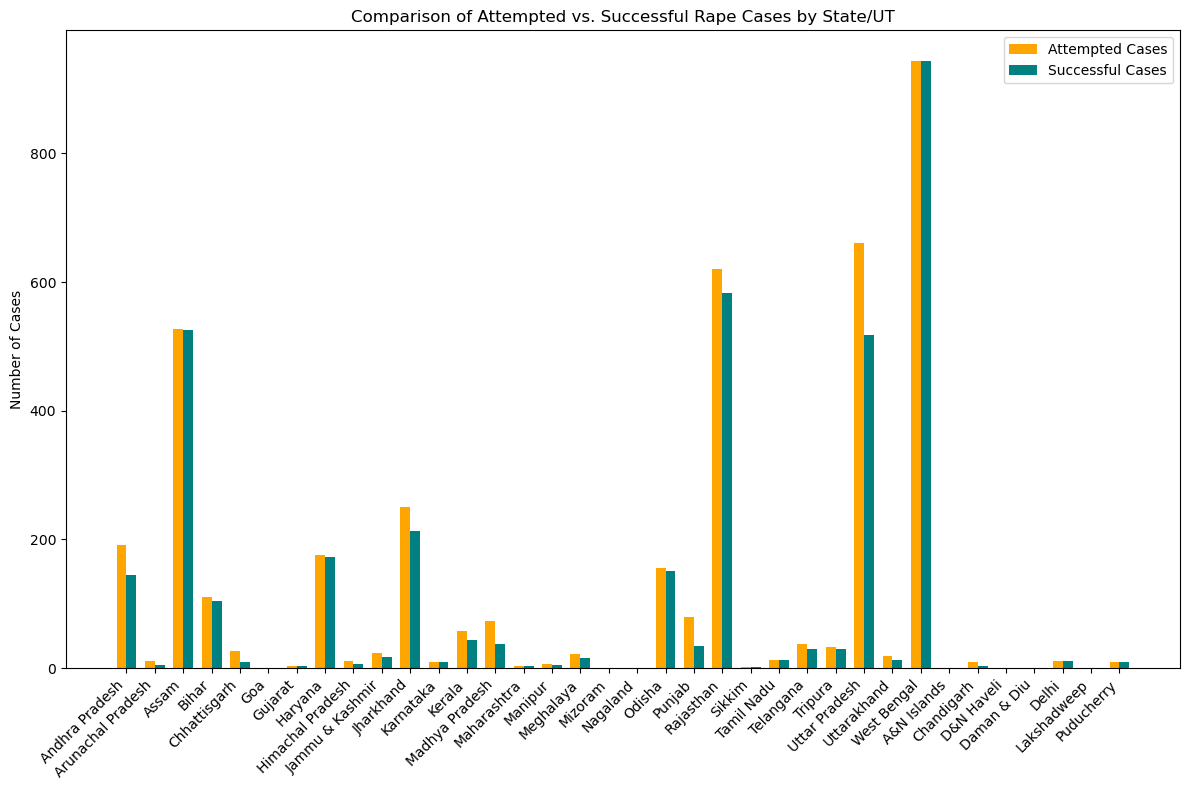

In [59]:
states = Attempt_to_commit_rape_I_V['State/UT']
attempted_cases = Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(I)']
successful_cases = Attempt_to_commit_rape_I_V['A) Women (18 Yrs. And above)(I)']

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

bar_positions_attempted = np.arange(len(states))
bar_positions_successful = bar_positions_attempted + bar_width

attempted_bar = ax.bar(bar_positions_attempted, attempted_cases, width=bar_width, label='Attempted Cases',color='orange')
successful_bar = ax.bar(bar_positions_successful, successful_cases, width=bar_width, label='Successful Cases',color='teal')

ax.set_xticks(bar_positions_attempted + bar_width / 2)
ax.set_xticklabels(states, rotation=45, ha='right')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Attempted vs. Successful Rape Cases by State/UT')
ax.legend()

plt.tight_layout()
plt.show()


<h3> Factors possibly co-related to rape counts:</h3>

  * Sex ratio
  * Literacy rate
  * population density
  * unemployment rate
  

In [60]:
Population_Dsitribution_statewise.describe()

,Area in sq. kms.,Male Population,Female Population,Total Population,Rural Population,Urban Population
count,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,93927.685714,1.780772e+07,1.678813e+07,3.459586e+07,2.382140e+07,9.515886e+06
std,103761.173574,2.305126e+07,2.141065e+07,4.445234e+07,3.301273e+07,1.240226e+07
min,30.000000,3.312300e+04,3.135000e+04,6.447300e+04,1.414100e+04,5.033200e+04
25%,9367.500000,7.265260e+05,6.946100e+05,1.421136e+06,5.385830e+05,5.836105e+05
50%,53483.000000,8.987326e+06,7.800615e+06,1.678794e+07,9.108060e+06,3.433242e+06
75%,145449.500000,3.122896e+07,2.953854e+07,6.076749e+07,3.610008e+07,1.615191e+07
max,342239.000000,1.044805e+08,9.533183e+07,1.998123e+08,1.553173e+08,5.081826e+07


In [61]:
index_telangana = Rape_under_Different_age_groups_2018[Rape_under_Different_age_groups_2018['State/UT ']=='Telangana '].index[0]
print(index_telangana)
dummy_Rape_under_Different_age_groups_2018 = Rape_under_Different_age_groups_2018.drop(index_telangana)

24


In [62]:
dummy_Rape_under_Different_age_groups_2018['State/UT '] = Population_Dsitribution_statewise['State/UT']

In [66]:
attr = Population_Dsitribution_statewise.columns
attr = list(attr)
#del attr[0]
for i in attr:
    dummy_Rape_under_Different_age_groups_2018[i]=Population_Dsitribution_statewise[i]


In [68]:
dummy_Rape_under_Different_age_groups_2018['population_density'] = dummy_Rape_under_Different_age_groups_2018['Total Population']/dummy_Rape_under_Different_age_groups_2018[' Area in sq. kms.']

In [69]:
dummy_Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False,inplace=True)

In [70]:
dummy_Rape_under_Different_age_groups_2018['Below_18'] = dummy_Rape_under_Different_age_groups_2018['Below 6 Years '] + dummy_Rape_under_Different_age_groups_2018['6 Years & Above (Below 12 Years) '] + dummy_Rape_under_Different_age_groups_2018['12 Years & Above(Below 16 Years)'] + dummy_Rape_under_Different_age_groups_2018['16 Years & Above(Below 18 Years )']
dummy_Rape_under_Different_age_groups_2018['18_to_45'] = dummy_Rape_under_Different_age_groups_2018['18 Years & Above( Below 30 Years )'] + dummy_Rape_under_Different_age_groups_2018['30 Years & Above (Below 45 Years)']
dummy_Rape_under_Different_age_groups_2018['45_and_above'] = dummy_Rape_under_Different_age_groups_2018['45 Years & Above(Below 60 Years)'] + dummy_Rape_under_Different_age_groups_2018['60 Years & Above ']

In [ ]:
dummy_Rape_under_Different_age_groups_2018['rural_population_density'] = dummy_Rape_under_Different_age_groups_2018['Rural Population']/dummy_Rape_under_Different_age_groups_2018[' Area in sq. kms.']

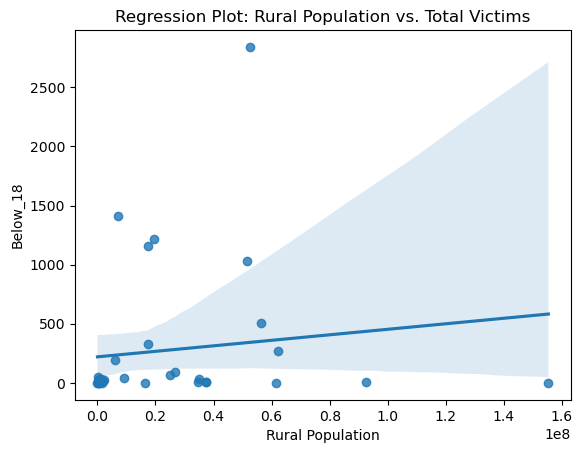

In [71]:
sns.regplot(x='Rural Population', y='Below_18', data=dummy_Rape_under_Different_age_groups_2018)
plt.title('Regression Plot: Rural Population vs. Total Victims')
plt.show()

In [72]:
Rape_under_Different_age_groups_2018_df = Rape_under_Different_age_groups_2018

In [73]:
sorted_age_group_df['state'] = states

In [74]:
import plotly.express as px

geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"

fig1 = px.choropleth(
    sorted_age_group_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='Below_18',
    color_continuous_scale='YlGnBu',
    hover_name='state',
)
fig2 = px.choropleth(
    sorted_age_group_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='18_to_45',
    color_continuous_scale='blues',
    hover_name='state',
)
fig3 = px.choropleth(
    sorted_age_group_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='45_and_above',
    color_continuous_scale='YlOrRd',
    hover_name='state',
)

fig1.update_geos(fitbounds="locations", visible=False)
fig2.update_geos(fitbounds="locations", visible=False)
fig3.update_geos(fitbounds="locations", visible=False)

fig1.show()
fig2.show()
fig3.show()


<h4>Note:</h4>
<p>The GeoJSON file utilized in this visualization may not be entirely compatible with our dataset, leading to the absence of some states on the map. Please be aware that this discrepancy is due to differences in state names or other factors between the GeoJSON file and our dataset. Our intention is solely to provide a visual representation based on the available data, and we appreciate your understanding.</p>


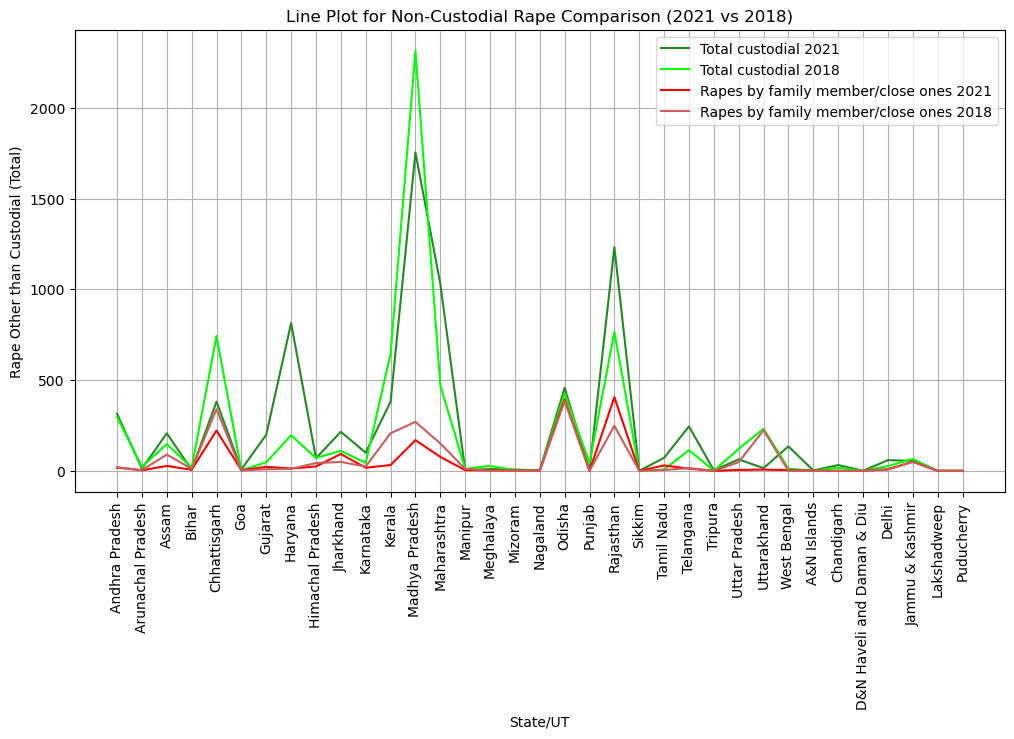

In [ ]:
title1 = "Total custodial 2021"
title2 = "Total custodial 2018"
title3 = "Rapes by family member/close ones 2021"
title4= "Rapes by family member/close ones 2018"
plt.figure(figsize=(12, 6))

plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape_2021['Rape Other than Custodial (Total)'],
          label=title1,color='forestgreen')
plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape['Rape Other than Custodial (Total)'],
          label=title2,color='lime')
plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape_2021['By Relative/ Guardian / Teacher/ Person in position of trust (Sec.376(2) (f)'],
          label=title3,color='red')
plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape['By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)'],
          label=title4,color='indianred')

plt.xlabel('State/UT')
plt.ylabel('Rape Other than Custodial (Total)')
plt.title('Line Plot for Non-Custodial Rape Comparison (2021 vs 2018)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

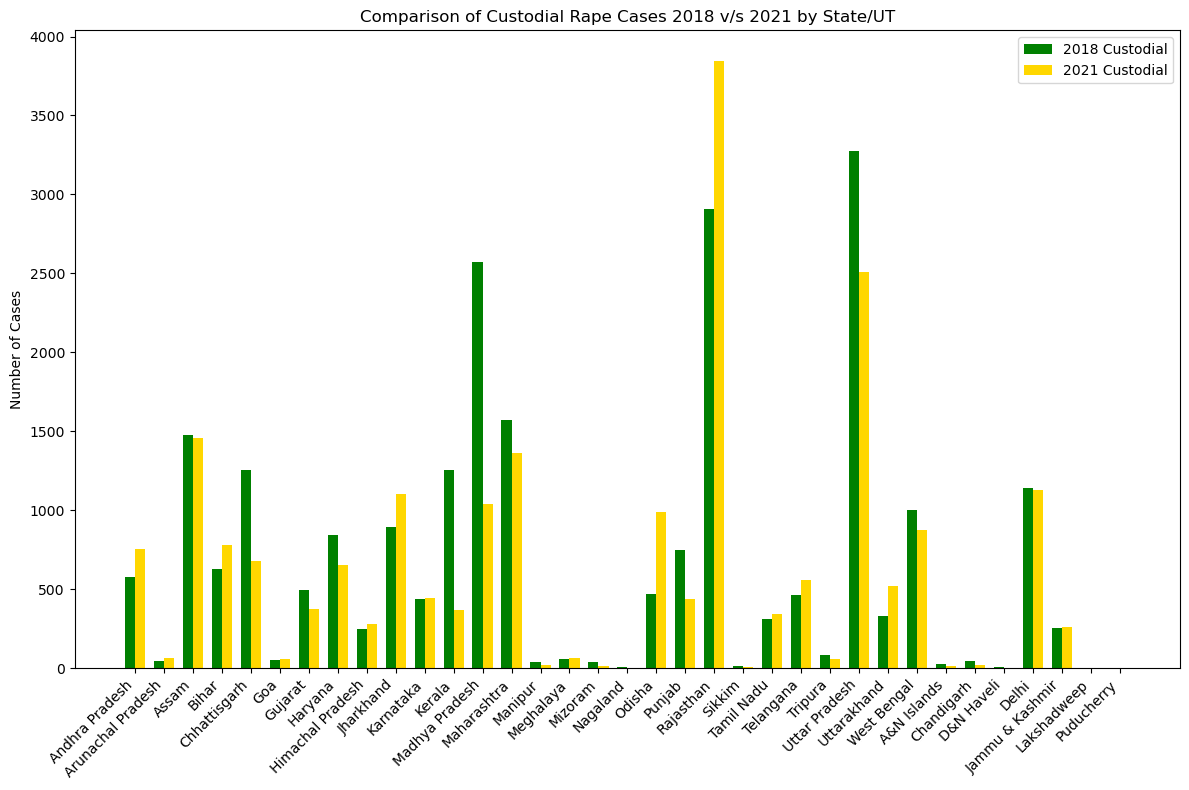

In [ ]:
states = Custodial_rape['State/UT']
Total_rapes_in_Custody = Custodial_rape['Punishment for Rape (Sec.376 & 376(I)']
Total_rapes_in_Custody_2021 = Custodial_rape_2021['Punishment for Rape (Sec.376 & 376(I)']

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

bar_positions_attempted = np.arange(len(Custodial_rape['Rape in Custody (Total)']))
bar_positions_successful = bar_positions_attempted + bar_width

Total_rapes_in_Custody = ax.bar(bar_positions_attempted, Total_rapes_in_Custody, width=bar_width, label='2018 Custodial',color='green')
Total_rapes_in_Custody_2021 = ax.bar(bar_positions_successful, Total_rapes_in_Custody_2021, width=bar_width, label='2021 Custodial',color='gold')

ax.set_xticks(bar_positions_attempted + bar_width / 2)
ax.set_xticklabels(states, rotation=45, ha='right')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Custodial Rape Cases 2018 v/s 2021 by State/UT')
ax.legend()

plt.tight_layout()
plt.show()


In [76]:
Rape_under_Different_age_groups_2018.fillna(0)
dtdf = Rape_under_Different_age_groups_2018.sort_values(by='Cases Reported ',ascending =False)
dtdf.drop(35,inplace=True)

# Rename columns to remove spaces and special characters
#df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

fig = px.sunburst(
    dtdf,
    path=['State/UT ', 'Cases Reported '],
    values='Total Victims ',
    color='Total Victims ',
    title='Sunburst Chart of Rape Cases Under Different Age Groups (2018)',
    color_continuous_scale='RdYlBu'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

KeyError: '[35] not found in axis'

In [78]:
Rape_under_Different_age_groups_2018.fillna(0)
dtdf = Rape_under_Different_age_groups_2018.sort_values(by='Cases Reported ',ascending =False)
#dtdf.drop(35,inplace=True)

fig = px.sunburst(
    dtdf,
    path=['State/UT ', 'Cases Reported ', 
       'Total Girl /Child Victims(Below 18)',
       'Total Women / Adult Victims(Above 18)'],
    values='Total Victims ',
    color='Total Victims ',
    title='Sunburst Chart of Rape Cases Under Different Age Groups (2018)',
    color_continuous_scale='RdYlBu'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [79]:

fig = px.area(
    Rape_under_Different_age_groups_2018,
    x='State/UT ',
    y=['Total Victims ','Total Women / Adult Victims(Above 18)','Total Girl /Child Victims(Below 18)'],
    title='Streamgraph of Rape Cases Under Different Age Groups (2018)',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_xaxes(tickangle=90) 
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [80]:
Rape_data_2020['State/UT'] = Rape_under_Different_age_groups_2018['State/UT ']

In [81]:
Police_Disposal_CrimeHead_Wise_2018.describe()

,Cases Pending Investigation from Previous Year,Cases Reported during the year,Cases Reopened for Investigation,Total Cases for Investigation,Cases Not Investigated Under 157_1_b CRPC,Cases True but Insufficient Evidence or Untraced or No Clue,Cases Abated during Investigation,Total,Cases Charge_sheeted Out of Cases from Previous Year,Cases Charge_sheeted Out of Cases during the Year,Cases Charge_sheeted
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,5426.400000,13835.800000,7.60000,19268.600000,1.800000,356.800000,27.600000,1296.000000,2896.80000,9256.600000,12150.400000
std,5760.502131,14257.038234,8.38451,20013.450809,2.949576,440.141682,30.843152,2018.977464,3020.36218,9334.849827,12354.314076
min,3.000000,4.000000,0.00000,6.000000,0.000000,13.000000,2.000000,15.000000,16.00000,17.000000,18.000000
25%,99.000000,294.000000,2.00000,393.000000,0.000000,24.000000,5.000000,33.000000,31.00000,193.000000,224.000000
50%,5507.000000,14124.000000,5.00000,19641.000000,1.000000,294.000000,14.000000,774.000000,2845.00000,9652.000000,12497.000000
75%,7761.000000,21401.000000,10.00000,29164.000000,1.000000,360.000000,42.000000,817.000000,4538.00000,15006.000000,19544.000000
max,13762.000000,33356.000000,21.00000,47139.000000,7.000000,1093.000000,75.000000,4841.000000,7054.00000,21415.000000,28469.000000
